## Titanic - Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.EDA import pass_with_age

#graphs appear in notebook
%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libaries loaded")

In [ ]:
train = pd.read_csv('../data/raw/train.csv')

print(f"Data shape: {train.shape}")
print(f"Columns: {list(train.columns)}")

In [ ]:
train.head(10)

## Missing data

In [ ]:
missing = train.isnull().sum()
missing_percent = round(missing / len(train)*100,2)

missing_df = pd.DataFrame({
    'Missing': missing,
    'Percent': missing_percent
})
print(missing_df[missing_df['Missing']>0])

## Survival rate by sex

In [ ]:
survival_by_sex = train.groupby('Sex')['Survived'].agg(['mean', 'count'])
survival_by_sex['mean'] = (survival_by_sex['mean'] * 100).round(1)
survival_by_sex.columns = ['Survival %', 'Total amount']

print(survival_by_sex)
plt.figure(figsize=(6, 3))
survival_by_sex['Survival %'].plot(kind='bar', color=['blue', 'red'])
plt.title('Survival rate by sex')
plt.ylabel('Survival percent')
plt.xlabel('sex')
plt.ylim(0, 100)
plt.show()

## Survival rate by Pclass

In [ ]:
survival_by_Pclass = train.groupby('Pclass')['Survived'].agg(['mean', 'count'])
survival_by_Pclass['mean'] = (survival_by_Pclass['mean'] * 100).round(1)
survival_by_Pclass.columns = ['Survival %', 'Total amount']

print(survival_by_Pclass)
plt.figure(figsize=(6, 3))
survival_by_Pclass['Survival %'].plot(kind='bar', color=['blue', 'red','green'],rot=0)
plt.title('Survival rate by Passenger class')
plt.ylabel('Survival percent')
plt.xlabel('Passenger class')
plt.ylim(0, 100)
plt.show()

## Survival rate by Age
almost 20% of Age data is missing

                 Survival Rate  Count
Children (<=12)           58.0   69.0
Teens (13-17)             47.7   44.0
Adults (19-59)            38.6  575.0
Elderly (>60)             26.9   26.0


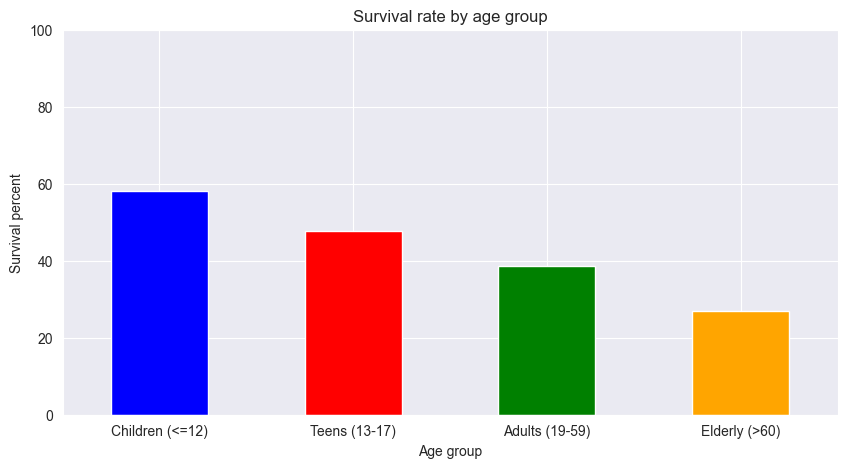

In [118]:
pass_with_age = train[train['Age'].notnull()]
"""
children_percent = ((pass_with_age[pass_with_age['Age']<=12]['Survived'].mean())*100).round(1)
teen_percent = ((pass_with_age[(pass_with_age['Age']>12) & (pass_with_age['Age']<18)]['Survived'].mean())*100).round(1)
adults_percent = ((pass_with_age[(pass_with_age['Age']>18) & (pass_with_age['Age']<60)]['Survived'].mean())*100).round(1)
elderly_percent = ((pass_with_age[pass_with_age['Age']>60]['Survived'].mean())*100).round(1)
"""


children_percent = pass_with_age[pass_with_age['Age']<=12]['Survived'].agg(['mean','count'])
children_percent['mean'] = (children_percent['mean'] * 100).round(1)
teen_percent = pass_with_age[(pass_with_age['Age']>12) & (pass_with_age['Age']<18)]['Survived'].agg(['mean','count'])
teen_percent['mean'] = (teen_percent['mean'] * 100).round(1)
adults_percent = pass_with_age[(pass_with_age['Age']>=18) & (pass_with_age['Age']<60)]['Survived'].agg(['mean','count'])
adults_percent['mean'] = (adults_percent['mean'] * 100).round(1)
elderly_percent = pass_with_age[pass_with_age['Age']>=60]['Survived'].agg(['mean','count'])
elderly_percent['mean'] = (elderly_percent['mean'] * 100).round(1)



survival_by_age_df = pd.DataFrame({
    'Children (<=12)': children_percent,
    'Teens (13-17)': teen_percent,
    'Adults (19-59)': adults_percent,
    'Elderly (>60)': elderly_percent
    
    }).T
     

survival_by_age_df.columns = ['Survival Rate','Count']   
    
print(survival_by_age_df)

plt.figure(figsize=(10, 5))
survival_by_age_df['Survival Rate'].plot(kind='bar', color=['blue', 'red','green','orange'],rot=0)
plt.title('Survival rate by age group')
plt.ylabel('Survival percent')
plt.xlabel('Age group')
plt.ylim(0, 100)
plt.show()



## Survival by Family Size
Family Size = SibSp + Parch
SibSp - # of siblings / spouses aboard the Titanic	
Parch - # of parents / children aboard the Titanic	

             Survival Rate  Count
Family size                      
0                     30.4    537
1                     55.3    161
2                     57.8    102
3                     72.4     29
4                     20.0     15
5                     13.6     22
6                     33.3     12
7                      0.0      6
10                     0.0      7


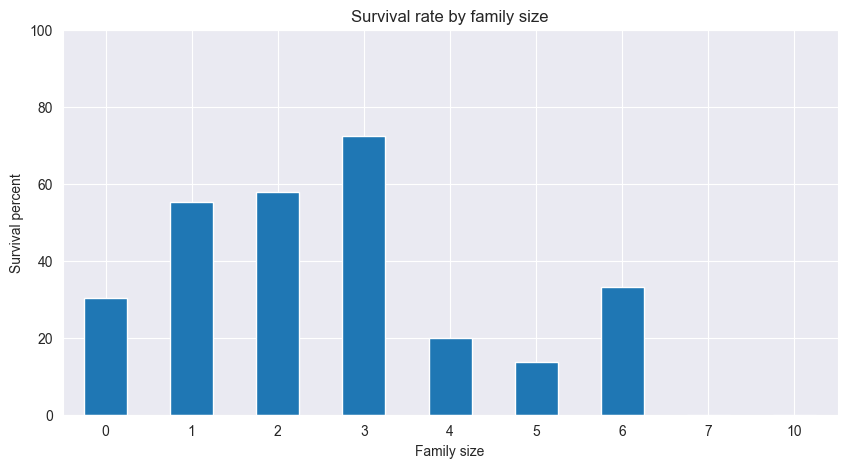

In [129]:
train['Family size'] = train['SibSp'] + train['Parch']
survival_by_fam_size = train.groupby('Family size')['Survived'].agg(['mean','count'])
survival_by_fam_size['mean'] = (survival_by_fam_size['mean'] * 100).round(1)
survival_by_fam_size.columns = ['Survival Rate', 'Count']
print(survival_by_fam_size)

plt.figure(figsize=(10, 5))
survival_by_fam_size['Survival Rate'].plot(kind='bar',rot=0)
plt.title('Survival rate by family size')
plt.ylabel('Survival percent')
plt.xlabel('Family size')
plt.ylim(0, 100)
plt.show()

